<a href="https://colab.research.google.com/github/indriyatirs/Animals-Image-Classification/blob/main/AnimalsImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir: Image Classification Model Deployment
- Nama: Indriyati Rahmi Setyani
- Email: indriyatirs@gmail.com
- Id Dicoding: indriyatirs
- Sumber Dataset: Animals-Kaggle
- Link Kaggle: https://www.kaggle.com/datasets/antobenedetti/animals

## Import Libraries

In [ ]:
import os
import glob
import warnings
import pathlib
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import itertools

from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings('ignore')

In [ ]:
# download file API akun kaggle

!gdown --id 1JLVL1Hwvs6Aky4eOgPJZpPf0FiATb7H_

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JLVL1Hwvs6Aky4eOgPJZpPf0FiATb7H_
To: /content/kaggle.json
100% 70.0/70.0 [00:00<00:00, 280kB/s]


In [ ]:
# membuat environment untuk menyimpan file dari kaggle

os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
# mendownload dataset menggunakan API dataset dari kaggle

!kaggle datasets download -d antobenedetti/animals

 99% 870M/882M [00:12<00:00, 116MB/s]
100% 882M/882M [00:12<00:00, 75.3MB/s]


In [ ]:
!unzip /content/animals.zip

Streaming output truncated to the last 5000 lines.
  inflating: animals/train/horse/horse2690.jpg  
  inflating: animals/train/horse/horse2691.jpg  
  inflating: animals/train/horse/horse2692.jpg  
  inflating: animals/train/horse/horse2693.jpg  
  inflating: animals/train/horse/horse2694.jpg  
  inflating: animals/train/horse/horse2695.jpg  
  inflating: animals/train/horse/horse2696.jpg  
  inflating: animals/train/horse/horse2697.jpg  
  inflating: animals/train/horse/horse2698.jpg  
  inflating: animals/train/horse/horse2699.jpg  
  inflating: animals/train/horse/horse27.jpg  
  inflating: animals/train/horse/horse270.jpg  
  inflating: animals/train/horse/horse2701.jpg  
  inflating: animals/train/horse/horse2702.jpg  
  inflating: animals/train/horse/horse2703.jpg  
  inflating: animals/train/horse/horse2704.jpg  
  inflating: animals/train/horse/horse2705.jpg  
  inflating: animals/train/horse/horse2706.jpg  
  inflating: animals/train/horse/horse2707.jpg  
  inflating: animals/

Dataset sudah berhasil di import dari Kaggle ke dalam google colab notebook

## Load Data

In [ ]:
image_data = '/content/animals/train'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,cat
1,horse
2,lion
3,elephant
4,dog


In [ ]:
image_files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(image_files)
labels = [os.path.dirname(i).split("/")[-1] for i in image_files]
imgdata = zip(image_files, labels)
df_image = pd.DataFrame(imgdata, columns = ["Image", "Label"])
df_image

,Image,Label
0,/content/animals/train/cat/cat2495.jpg,cat
1,/content/animals/train/elephant/elephant2718.jpg,elephant
2,/content/animals/train/cat/cat213.jpg,cat
3,/content/animals/train/dog/dog1745.jpg,dog
4,/content/animals/train/elephant/elephant534.jpg,elephant
...,...,...
13469,/content/animals/train/cat/cat275.jpg,cat
13470,/content/animals/train/lion/lion2302.jpg,lion
13471,/content/animals/train/horse/horse419.jpg,horse
13472,/content/animals/train/lion/lion780.jpg,lion


In [ ]:
df_image.shape

(13474, 2)

In [ ]:
# menampilkan resolusi gambar dari dataset
for path in df_image['Image']:
  image_name = Image.open(path)
  print(image_name.size)

Streaming output truncated to the last 5000 lines.
(512, 512)
(512, 512)
(1024, 768)
(512, 512)
(1024, 683)
(512, 512)
(275, 183)
(64, 64)
(275, 183)
(512, 512)
(512, 512)
(512, 512)
(64, 64)
(64, 64)
(64, 64)
(1024, 768)
(512, 512)
(512, 512)
(274, 184)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(64, 64)
(267, 189)
(64, 64)
(64, 64)
(275, 183)
(512, 512)
(512, 512)
(300, 168)
(64, 64)
(1024, 679)
(512, 512)
(512, 512)
(512, 512)
(64, 64)
(300, 168)
(512, 512)
(759, 422)
(1024, 682)
(512, 512)
(64, 64)
(64, 64)
(64, 64)
(512, 512)
(64, 64)
(512, 512)
(512, 512)
(64, 64)
(300, 200)
(1024, 791)
(512, 512)
(64, 64)
(682, 1024)
(64, 64)
(1600, 1085)
(512, 512)
(64, 64)
(402, 125)
(310, 163)
(512, 512)
(64, 64)
(225, 224)
(512, 512)
(512, 512)
(294, 172)
(64, 64)
(512, 512)
(300, 168)
(64, 64)
(1024, 624)
(64, 64)
(64, 64)
(275, 183)
(512, 512)
(512, 512)
(512, 512)
(64, 64)
(1280, 960)
(1024, 693)
(64, 64)
(512, 512)
(512, 512)
(64, 64)
(64, 64)
(3000, 2089)
(64, 64)
(512, 512)

In [ ]:
df_image['Label'].value_counts()

cat         2737
elephant    2730
horse       2705
lion        2675
dog         2627
Name: Label, dtype: int64

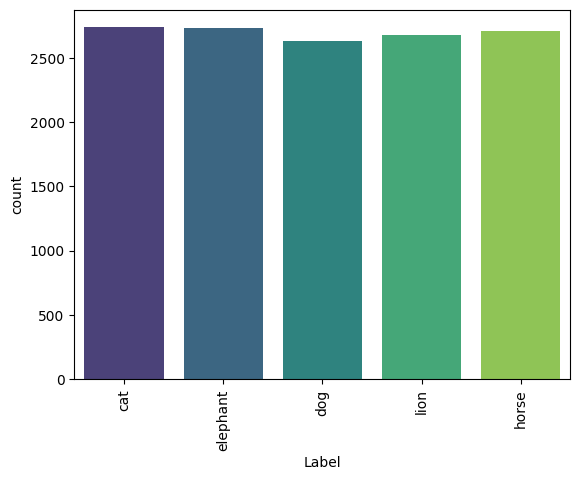

In [ ]:
sns.countplot(data=df_image, x='Label', palette='viridis')

plt.tick_params(axis='x', labelrotation=90)
plt.show()

## Image Data Generator

### Image Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20,
                    horizontal_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    zoom_range=0.2,
                    validation_split = 0.2)

### Split Data

In [ ]:
train_generator = train_datagen.flow_from_directory(
        image_data,
        target_size=(150, 150),
        class_mode='categorical',
        batch_size = 32,
        shuffle = True,
        subset = 'training'
        )

validation_generator = train_datagen.flow_from_directory(
        image_data,
        target_size=(150, 150),
        class_mode='categorical',
        shuffle = True,
        batch_size = 32,
        subset = 'validation'
        )

Found 10780 images belonging to 5 classes.
Found 2694 images belonging to 5 classes.


## Show Image and Label From Train Generator

In [ ]:
list_labels = list(train_generator.class_indices.keys())
print(list_labels)

['cat', 'dog', 'elephant', 'horse', 'lion']


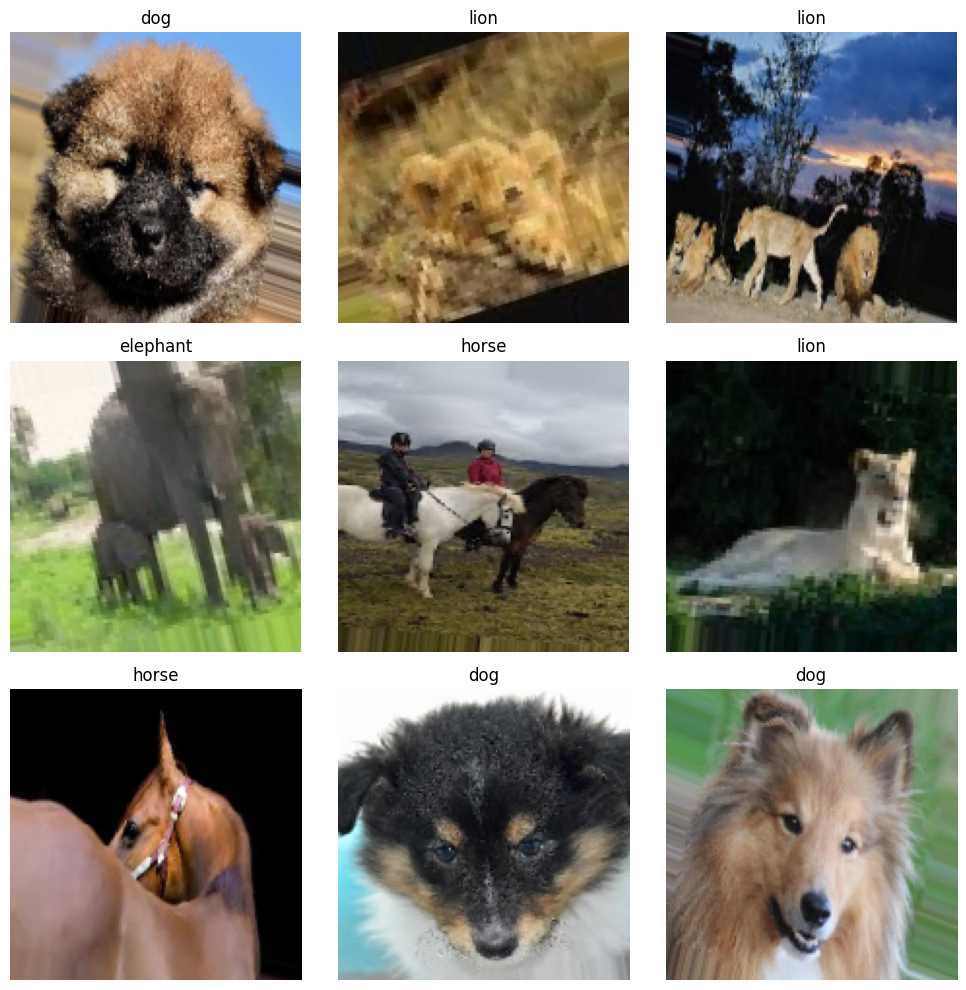

In [ ]:
images, labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images[i])
  plt.title(list_labels[np.argmax(labels[i])])
  plt.axis("off")
plt.tight_layout()
plt.show()

## CNN Model

### Sequential Model

In [ ]:
IMG_SIZE = (150, 150)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = MobileNetV2(input_shape = IMG_SHAPE,
                         include_top = False,
                         weights = 'imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])
#model.layers[0].trainable = False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 conv2d (Conv2D)             (None, 5, 5, 64)          737344    
                                                                 
 max_pooling2d (MaxPooling2  (None, 2, 2, 64)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1.0000e-04)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=["accuracy"])

### Model Fitting

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.92) and (logs.get('accuracy') > 0.92):
      print("\nIterasi berhenti, akurasi model lebih dari 92%")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
training_samples = 10780
validation_samples = 2694
batch_size = 32

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch = training_samples // batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps = validation_samples // batch_size,
      callbacks=[callbacks]
      )

Epoch 1/30
336/336 [==============================] - 129s 361ms/step - loss: 0.9045 - accuracy: 0.6535 - val_loss: 0.3051 - val_accuracy: 0.8999
Epoch 2/30
336/336 [==============================] - 117s 347ms/step - loss: 0.4155 - accuracy: 0.8475 - val_loss: 0.2496 - val_accuracy: 0.9081
Epoch 3/30
336/336 [==============================] - 118s 352ms/step - loss: 0.3307 - accuracy: 0.8787 - val_loss: 0.2082 - val_accuracy: 0.9230
Epoch 4/30
336/336 [==============================] - 118s 351ms/step - loss: 0.2944 - accuracy: 0.8937 - val_loss: 0.2005 - val_accuracy: 0.9301
Epoch 5/30
336/336 [==============================] - 119s 354ms/step - loss: 0.2788 - accuracy: 0.8995 - val_loss: 0.1844 - val_accuracy: 0.9394
Epoch 6/30
336/336 [==============================] - 118s 351ms/step - loss: 0.2581 - accuracy: 0.9076 - val_loss: 0.1761 - val_accuracy: 0.9390
Epoch 7/30
336/336 [==============================] - 100s 296ms/step - loss: 0.2529 - accuracy: 0.9095 - val_loss: 0.1784 -

### Plotting the Model Metrics

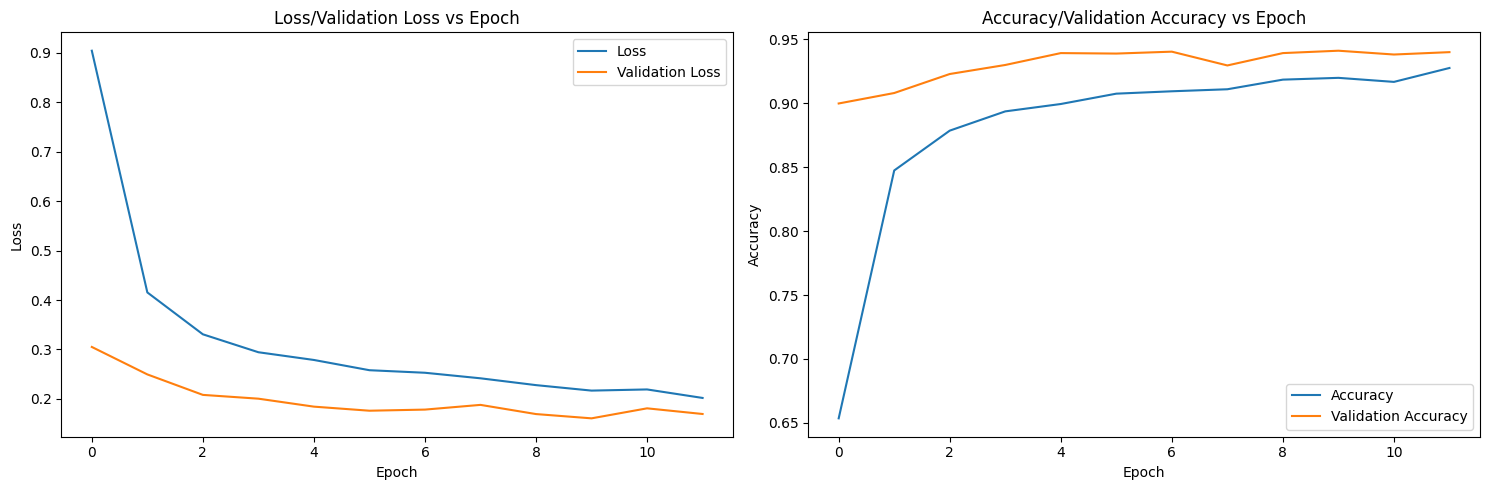

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax[0].plot(history.history['loss'], label='Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')

ax[0].set_title('Loss/Validation Loss vs Epoch')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='best')

ax[1].plot(history.history['accuracy'], label='Accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation Accuracy')

ax[1].set_title('Accuracy/Validation Accuracy vs Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

## Confusion Matrix

Dataset yang digunakan berasal dari folder yang berbeda

In [ ]:
test = '/content/animals/val'

In [ ]:
test_datagen = ImageDataGenerator(
                    rescale = 1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(
        test,
        target_size=(150, 150),
        class_mode='categorical',
        shuffle = False,
        batch_size = 32
        )

Found 1497 images belonging to 5 classes.


In [ ]:
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
labels = {v:k for k, v in train_generator.class_indices.items()}

47/47 [==============================] - 4s 83ms/step


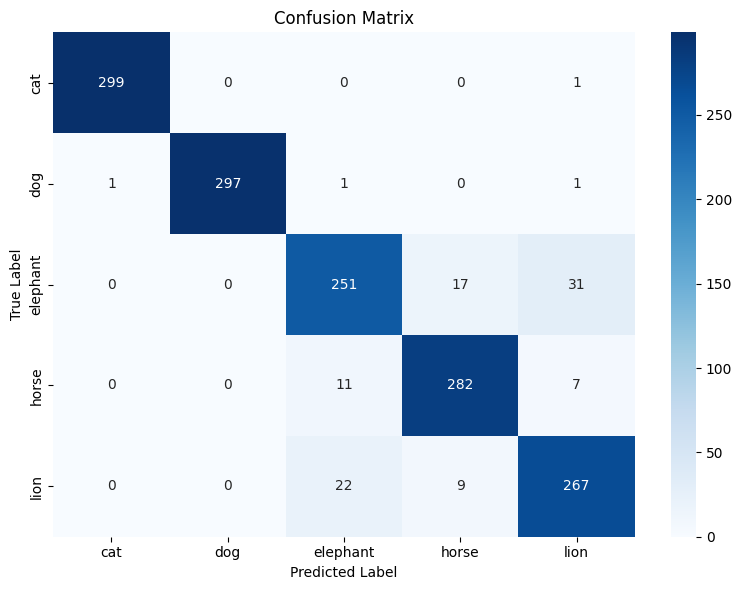

In [ ]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
box_labels = [v for v in group_counts]
box_labels = np.asarray(box_labels).reshape(5, 5)

plt.figure(figsize = (8, 6))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap=plt.cm.Blues, fmt="", annot=box_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

## Image Prediction

In [ ]:
val_files = [i for i in glob.glob(test + "//*//*")]
np.random.shuffle(val_files)
val_labels = [os.path.dirname(i).split("/")[-1] for i in image_files]
imgval = zip(val_files, val_labels)
val_df = pd.DataFrame(imgval, columns = ["Image", "Label"])
val_df

,Image,Label
0,/content/animals/val/elephant/elephant5.jpg,cat
1,/content/animals/val/horse/horse191.png,elephant
2,/content/animals/val/elephant/elephant6.jpg,cat
3,/content/animals/val/dog/dog238.jpg,dog
4,/content/animals/val/cat/cat264.jpg,elephant
...,...,...
1492,/content/animals/val/lion/lion110.jpg,horse
1493,/content/animals/val/dog/dog89.jpg,dog
1494,/content/animals/val/cat/cat291.jpg,elephant
1495,/content/animals/val/lion/lion20.jpg,elephant


In [ ]:
testdf = val_df.sample(n = 10, random_state=42)

1/1 [==============================] - 0s 31ms/step


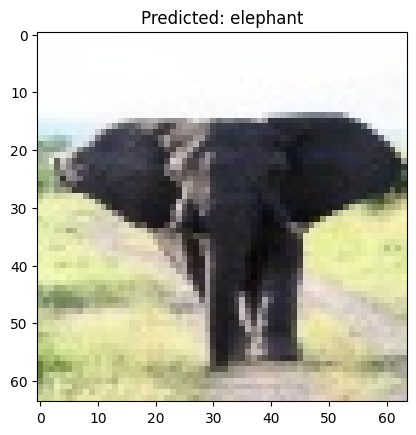

1/1 [==============================] - 0s 32ms/step


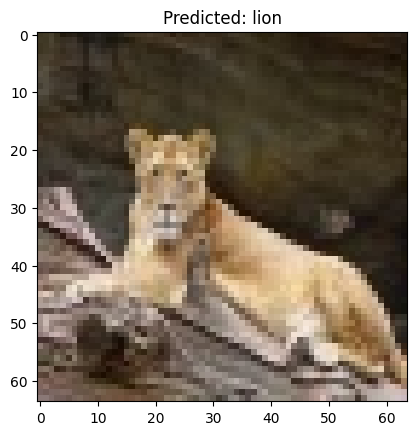

1/1 [==============================] - 0s 34ms/step


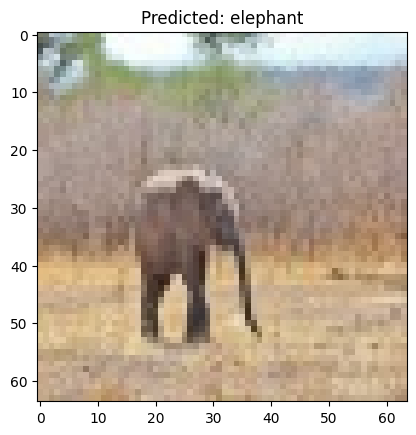

1/1 [==============================] - 0s 22ms/step


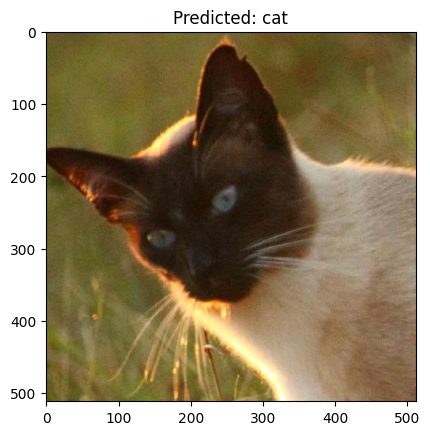

1/1 [==============================] - 0s 22ms/step


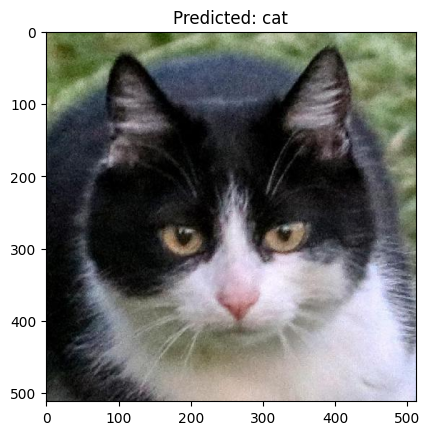

1/1 [==============================] - 0s 26ms/step


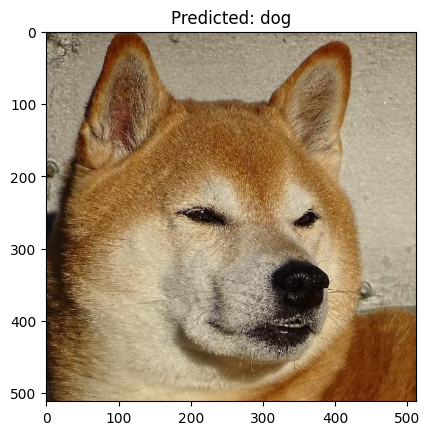

1/1 [==============================] - 0s 36ms/step


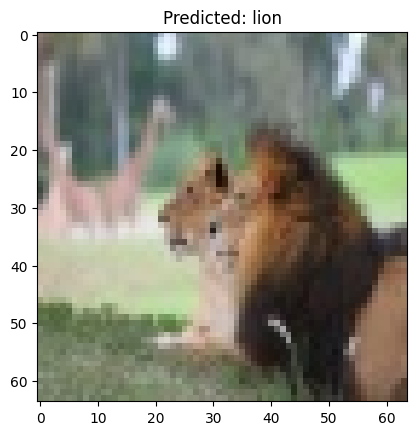

1/1 [==============================] - 0s 21ms/step


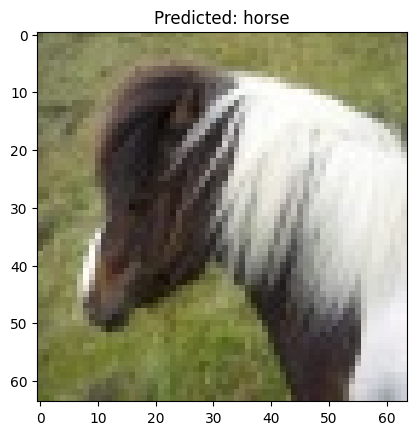

1/1 [==============================] - 0s 23ms/step


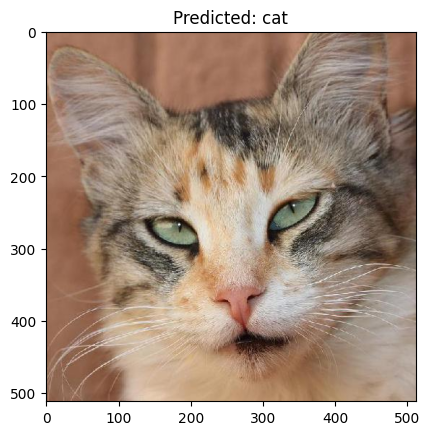

1/1 [==============================] - 0s 24ms/step


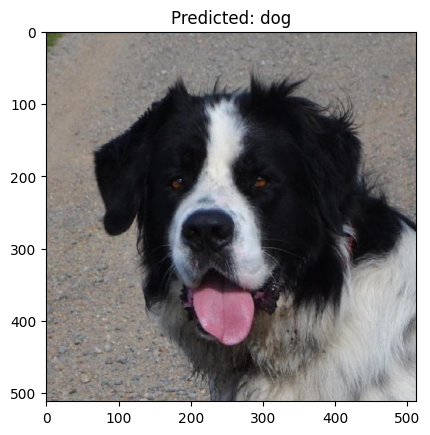

In [ ]:
for path in testdf['Image']:
  images_test = image.load_img(path)

  img = cv2.imread(path)
  img = cv2.resize(img, (150,150))
  img = np.reshape(img, [1,150,150,3])
  img = img/255

  pred = model.predict(img)
  max_idx = np.argmax(pred)

  class_label = list(train_generator.class_indices.keys())
  predicted_label = class_label[max_idx]
  plt.imshow(images_test)
  plt.title(f'Predicted: {predicted_label}')
  plt.show()

## Save Model

In [ ]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('animals_classification.tflite')
tflite_model_file.write_bytes(tflite_model)

11891936